In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as pxs

df = pd.read_csv('/content/CHURN_TELECON_TREATED.csv', delimiter= ',')

#Visualização de dados:

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No,No,One year,Mailed check,65.607563,1022.95,No
5,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),65.607563,7382.25,No
6,4190-MFLUW,Female,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),65.607563,528.35,Yes
7,4183-MYFRB,Female,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,65.607563,1862.90,No
8,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,65.607563,39.65,Yes
9,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No,No,One year,Bank transfer (automatic),65.607563,202.25,No


In [3]:
#Conferindo a presença de valores nulos:
print('Conferindo a presença de valores nulos: ')
valores_nulos = df.isnull().sum()
print(valores_nulos)

Conferindo a presença de valores nulos: 
customerID            0
Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
PhoneService          0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64


In [4]:
#Base Estatística
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178
std,0.368135,24.636885,27.984700,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,65.607563,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


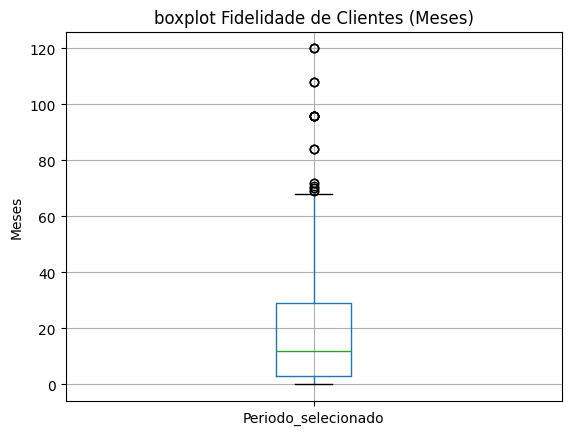

In [5]:
# Construindo a contagem de meses de contrato

df['Tipo_Contrato'].value_counts()
#contagem de tipos de contratos e objetificação.
#print(df['Tipo_Contrato'].value_counts())

df['Meses_contrato'] = df['Tipo_Contrato'].replace({
   'Month-to-month': '1',
   'Two year': '24',
   'One year': '12',
   })
df['Meses_contrato'] = df['Meses_contrato'].astype(float)

#montagem de periodo:

df['periodo'] = df['Meses_contrato'] * df['Tempo_como_Cliente']
#print(df['periodo'])

# Há possiveis erros de digitação ou informações erradas no data frame;
# Irei fazer um período selecionado para remover dados outlier;

#selecionando periodo:
df['periodo'] = df['Meses_contrato'].astype(float) * df['Tempo_como_Cliente']
df['Periodo_selecionado'] = df['Tempo_como_Cliente'] * df['Meses_contrato']
df['clientes_selecionado'] = df['Periodo_selecionado']<= 120

df_filtrado = df[df['clientes_selecionado'] == True]

#Exibindo meses contratados de maneira correta com outliers que contratam por grandes períodos

df_filtrado.boxplot(column= 'Periodo_selecionado')
plt.title('boxplot Fidelidade de Clientes (Meses)')
plt.ylabel('Meses')
plt.show()


Avaliando o periodo de 10 anos de serviço notamos:

Existem clientes outliers campeões de fidelidade que permanecem conosco a mais de 6 anos.

A maioria de nossos clientes deixam de consumir nossos produtos no período de 4 anos e meio.

Um meio sugerido para reduzir churn envolve incentivar a fidelidade de nossos planos por meio de benefícios e descontos para clientes de longa data.



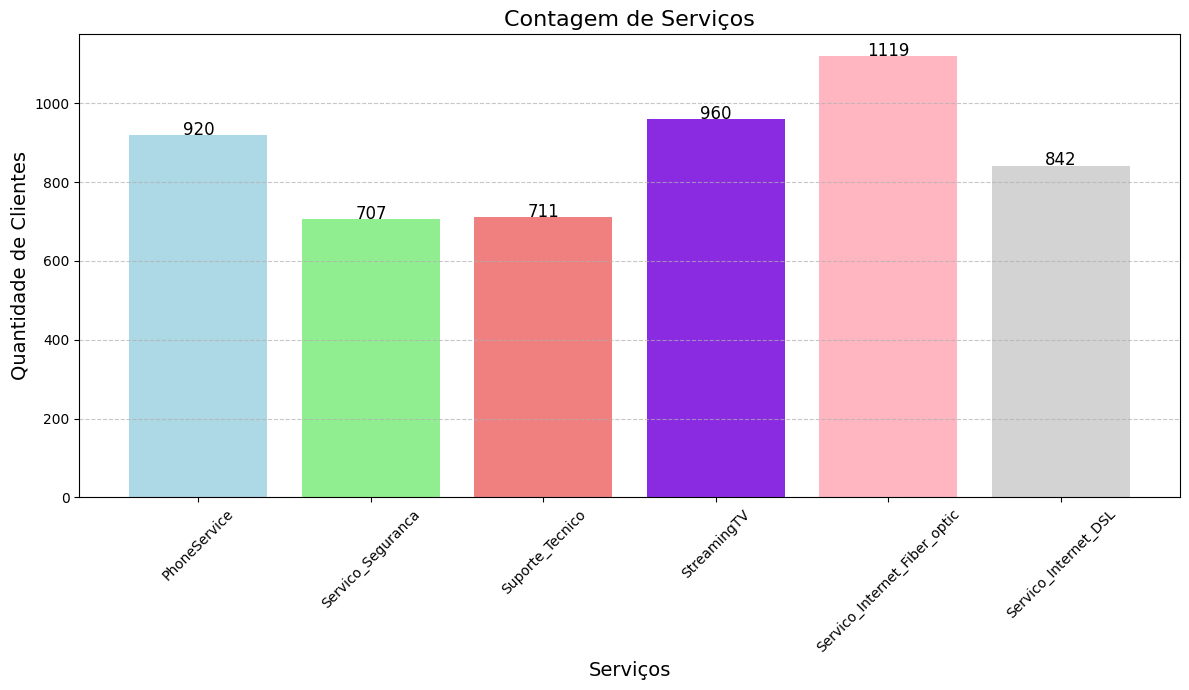

In [6]:
#Contagem dos serviços
PhoneService = df['PhoneService'].value_counts()['Yes']
Servico_Seguranca = df['Servico_Seguranca'].value_counts()['Yes']
Suporte_Tecnico = df['Suporte_Tecnico'].value_counts()['Yes']
StreamingTV = df['StreamingTV'].value_counts()['Yes']
Servico_Internet_Fiber_optic = df['Servico_Internet'].value_counts()['Fiber optic']
Servico_Internet_DSL = df['Servico_Internet'].value_counts()['DSL']

# Criando um dicionário com as contagens
servicos = {
    'PhoneService': PhoneService,
    'Servico_Seguranca': Servico_Seguranca,
    'Suporte_Tecnico': Suporte_Tecnico,
    'StreamingTV': StreamingTV,
    'Servico_Internet_Fiber_optic': Servico_Internet_Fiber_optic,
    'Servico_Internet_DSL': Servico_Internet_DSL
}

# Plotando o histograma
plt.figure(figsize=(12, 7))
bars = plt.bar(servicos.keys(), servicos.values(), color=['lightblue', 'lightgreen', 'lightcoral', 'blueviolet', 'lightpink', 'lightgrey'])

plt.title('Contagem de Serviços', fontsize=16)
plt.xlabel('Serviços', fontsize=14)
plt.ylabel('Quantidade de Clientes', fontsize=14)

# Adicionando contagem no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, str(height), ha='center', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribuição dos Serviços Utilizados pelos Clientes

Distribuição de Churn (%):
Churn
No     73.995177
Yes    26.004823
Name: proportion, dtype: float64


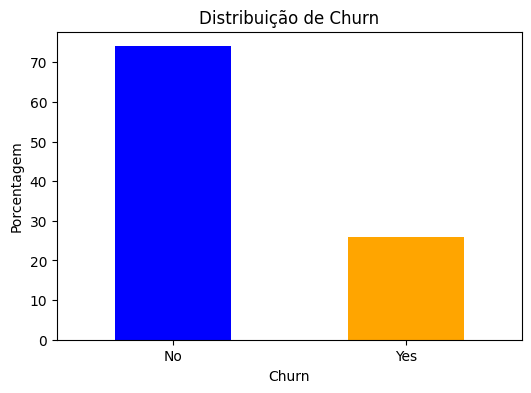

In [ ]:
import matplotlib.pyplot as plt

# Distribuição de churn
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print("Distribuição de Churn (%):")
print(churn_counts)

# Visualização
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Porcentagem')
plt.xticks(rotation=0)
plt.show()

A porcentagem de clientes que cancelaram o serviço pode indicar a gravidade do problema de churn.


In [7]:
import pandas as pd
import plotly.express as px

#internet divisão
df['Servico_Internet']
# Contar o total e churn para cada tipo de conexão de internet
internet_churn = df.groupby(['Servico_Internet', 'Churn']).size().reset_index(name='Contagem')

# Lista de serviços para análise
servicos = ['Servico_Internet', 'StreamingTV', 'Servico_Seguranca', 'Suporte_Tecnico', 'PhoneService']

# Criar um DataFrame para armazenar os resultados
churn_rates = []

# Calcular taxa de churn para cada serviço
for servico in servicos:

    # Contar o total de clientes por categoria
    total = df[servico].value_counts()

    # Contar churn (Yes) por categoria
    churn_yes = df[df['Churn'] == 'Yes'][servico].value_counts()

    for categoria in total.index:
        # Calcular a taxa de churn
        churn_rate = churn_yes.get(categoria, 0) / total[categoria]
        churn_rates.append({
            'Serviço': servico,
            'Categoria': categoria,
            'Taxa de Churn': churn_rate,
            'Status': 'churn' if categoria == 'Yes' else 'no_churn'
        })

churn_df = pd.DataFrame(churn_rates)

# Gráfico - taxas de churn
fig = px.bar(
    churn_df,
    x='Serviço',
    y='Taxa de Churn',
    color='Categoria',
    barmode='group',
    title='Taxa de Churn por Serviço e Categoria',
    labels={'Taxa de Churn': 'Taxa de Churn (%)'},
    text='Taxa de Churn'
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat='.0%',
    xaxis_title='Serviço',
    yaxis_title='Taxa de Churn'
)
fig.show()

Avaliando a taxa de churn notamos:

Muitas pessoas estão optando por se desligar de serviços;

Serviços com alta taxa de churn para a categoria podem ser menos satisfatórios ou mais caros;

Clientes que não usam determinados serviços podem ter maior churn devido à percepção de baixo valor e pouco a oferecer;

Nossos serviços de internet podem não estar satisfazendo os clientes e por isso optam pelo desligamento.

Churn por Tipo de Contrato (%):
Churn                  No        Yes
Tipo_Contrato                       
Month-to-month  57.633309  42.366691
One year        88.781431  11.218569
Two year        98.504983   1.495017


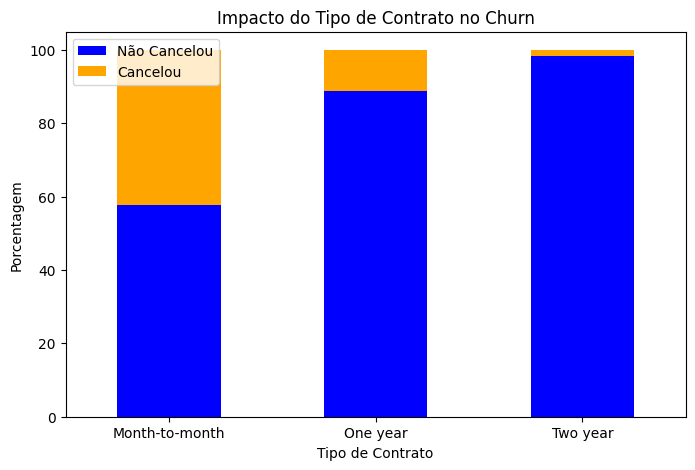

In [8]:
# Churn por tipo de contrato
contrato_churn = df.groupby('Tipo_Contrato')['Churn'].value_counts(normalize=True).unstack() * 100
print("Churn por Tipo de Contrato (%):")
print(contrato_churn)

# Visualização
contrato_churn.plot(kind='bar', stacked=True, figsize=(8, 5), color=['blue', 'orange'])
plt.title('Impacto do Tipo de Contrato no Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentagem')
plt.legend(['Não Cancelou', 'Cancelou'])
plt.xticks(rotation=0)
plt.show()

Contratos mais longos geralmente têm menor churn, enquanto contratos mensais podem estar associados a maior cancelamento.

/tmp/ipython-input-3495702778.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




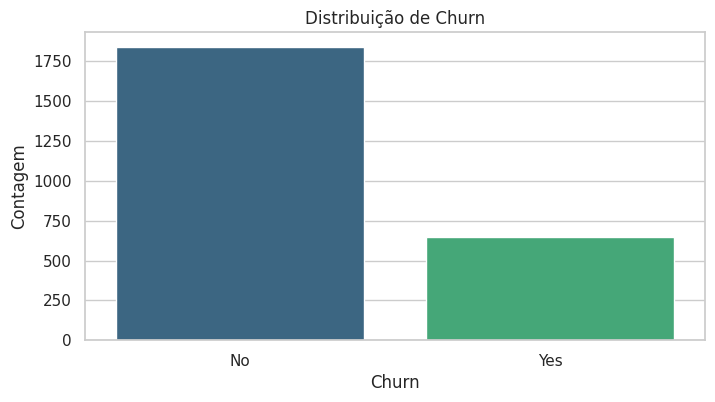

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#configuração grafica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Questão 1: Distribuição de Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()

Distribuição Geral do Churn

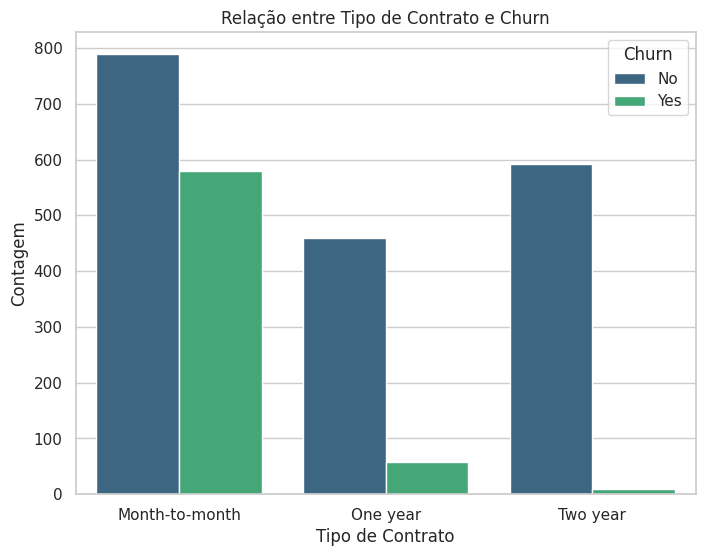

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tipo_Contrato', hue='Churn', palette='viridis')
plt.title('Relação entre Tipo de Contrato e Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right')
plt.show()

Impacto do Tipo de Contrato no Churn

Contratos longos tendem a ter menos churn



<ipython-input-11-a313ecc4cebb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Pagamento_Mensal', palette='viridis')


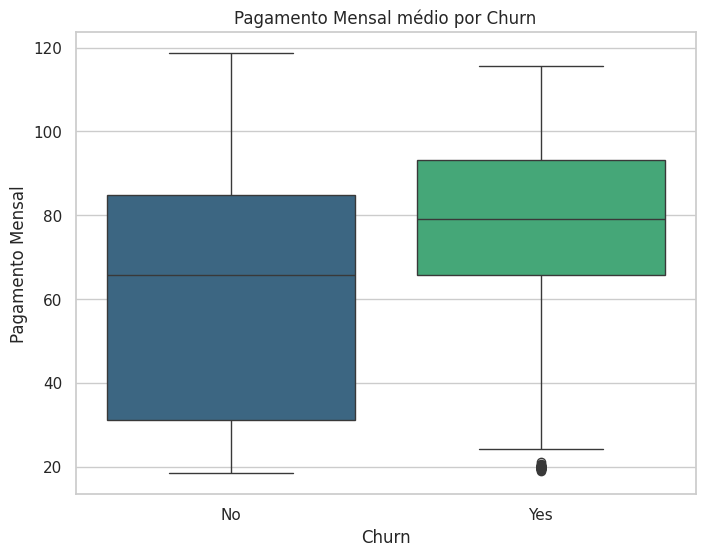

In [ ]:
# Questão 3: Pagamento Mensal médio por Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Pagamento_Mensal', palette='viridis')
plt.title('Pagamento Mensal médio por Churn')
plt.xlabel('Churn')
plt.ylabel('Pagamento Mensal')
plt.show()

Relação entre Pagamento Mensal e Churn

Pessoas que consomem mensalmente, pagam mensalmente e tendem a trocar de serviços de maneira muito mais fácil.

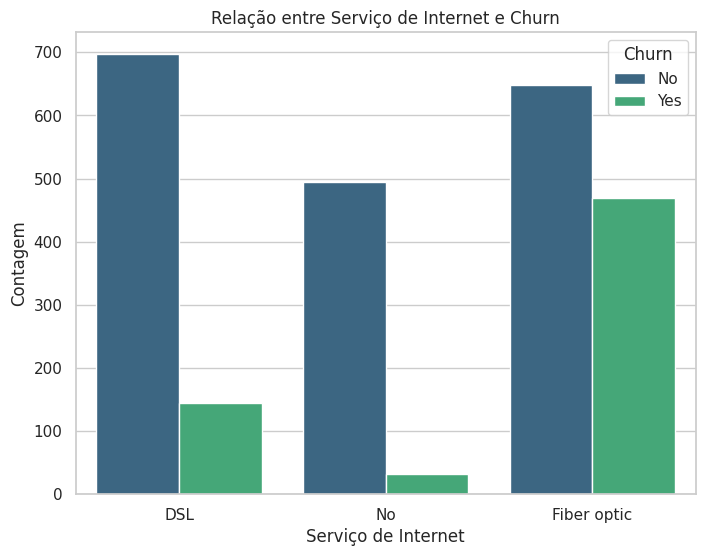

In [ ]:
# Questão 4: Relação entre Serviços de Internet e Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Servico_Internet', hue='Churn', palette='viridis')
plt.title('Relação entre Serviço de Internet e Churn')
plt.xlabel('Serviço de Internet')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right')
plt.show()

Influência do Serviço de Internet no Churn

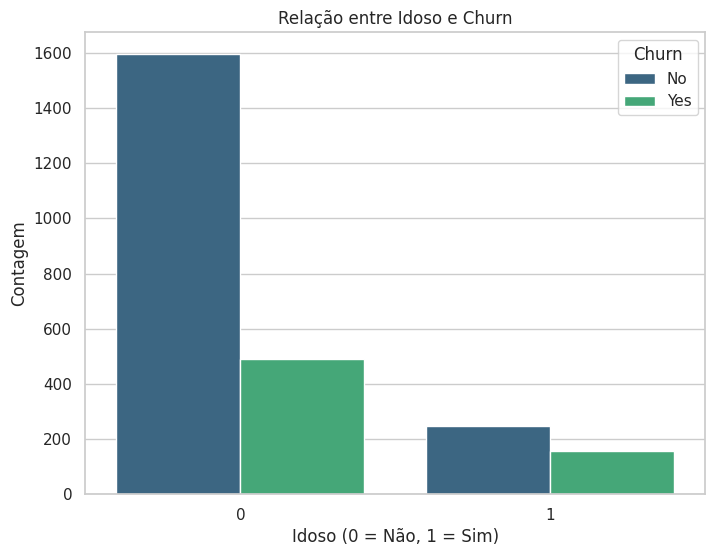

In [ ]:
# Questão 5: Relação entre Idoso e Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Idoso', hue='Churn', palette='viridis')
plt.title('Relação entre Idoso e Churn')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right')
plt.show()


Análise do Churn em Clientes Idoso
Nota-se que idosos consomem muito menos os nossos serviços enquanto pessoas não idosas consomem até 5 vezes mais, porém observando é notável que idosos cancelam muito mais devido ao fato que são muito menos dependentes de nossos serviços.


In [ ]:
# B) Variáveis mais importantes relacionadas ao Churn
importantes = ["Tipo_Contrato", "Pagamento_Mensal", "Tempo_como_Cliente", "Servico_Internet", "Idoso"]
print("As variáveis mais importantes para o Churn são:")
for i, var in enumerate(importantes, 1):
    print(f"{i}. {var}")

As variáveis mais importantes para o Churn são:
1. Tipo_Contrato
2. Pagamento_Mensal
3. Tempo_como_Cliente
4. Servico_Internet
5. Idoso
